In [129]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import control

def traces(i):
    """Get traces of dataset @i"""
    df = pd.read_csv('data/WBI%s.csv' % i, index_col=0)
    labs0 = [n for n in df.columns if any(c.isalpha() for c in n) and n not in ['bullshit', 'bullshit.1', 'PVCR.1', 'AS10.1', 'VD13.1']]
    return df[labs0]
    
W0 = pd.read_csv('conn.csv', index_col=0)
W = pd.read_csv('res2.csv', index_col=0)
W.columns = W0.columns
W.index = W0.index


In [206]:
DT = 0.05
R0 = 5
RMAX = 100

def r(x):
#     x = R0*np.tanh(x/R0) * (x < 0) + (RMAX - R0)*np.tanh(x/(RMAX-R0)) * (x>=0)
    return x

def step(x, i, w):
    dx = (-x + i + np.dot(w, r(x))) * DT
    x = x + dx
    return x

def calculate(W, init=None, inj=None):
    if init is None:
        init = 800*np.random.uniform(size=len(W))
        init = np.zeros(len(W))
    X = [init]

    if inj is None:
        inj = np.zeros(100)
    print(inj.shape)
    for i in inj:
        X.append(step(X[-1], i, W))

    return np.array(X)

In [211]:
A = W - np.identity(len(W))
X = 2 * np.identity(len(W))
Q = control.lyap(A.T, X)

# plt.figure(figsize=(15,5))
# plt.bar(x=range(len(W)), height=Q[0])
# idx = np.abs(Q[0]) > 1
# plt.xticks(np.arange(len(W))[idx], W.index[idx], rotation='vertical')
# plt.show()

# plt.figure(figsize=(15,5))
# plt.bar(x=range(len(W)), height=Q[-1])
# idx = np.abs(Q[-1]) > 1
# plt.xticks(np.arange(len(W))[idx], W.index[idx], rotation='vertical')
# plt.show()

# df = traces(0)
# INIT = df.iloc[200]

# print(INIT.shape, W.shape)
# plt.figure(figsize=(15,5))
# plt.bar(x=range(len(W)), height=INIT)
# idx = np.abs(INIT) > 1
# plt.xticks(np.arange(len(W))[idx], W.index[idx], rotation='vertical')
# plt.show()

def bar(vec):
    plt.figure(figsize=(15,5))
    plt.bar(x=range(len(W)), height=vec)
    idx = np.abs(vec) >= 0.1
    plt.xticks(np.arange(len(W))[idx], W.index[idx], rotation='vertical')
    plt.show()

ava = list(W.columns).index('AVAL')
avb = list(W.columns).index('AVBL')
avar = list(W.columns).index('AVAR')
avbr = list(W.columns).index('AVBR')

I = np.random.uniform(size=(1000, len(W)))
# I[:,ava] = 100#*np.sin(np.arange(1000))
# I[:,avb] = 100#*np.sin(np.arange(1000))
# I[:,avar] = 100#*np.sin(np.arange(1000))
# I[:,avbr] = 100#*np.sin(np.arange(1000))

(1000, 85)
(1001, 85)


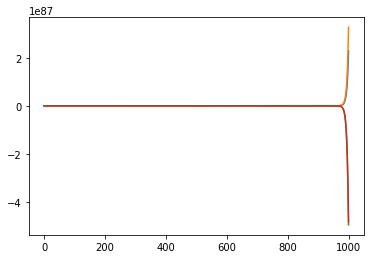

(1000, 85)


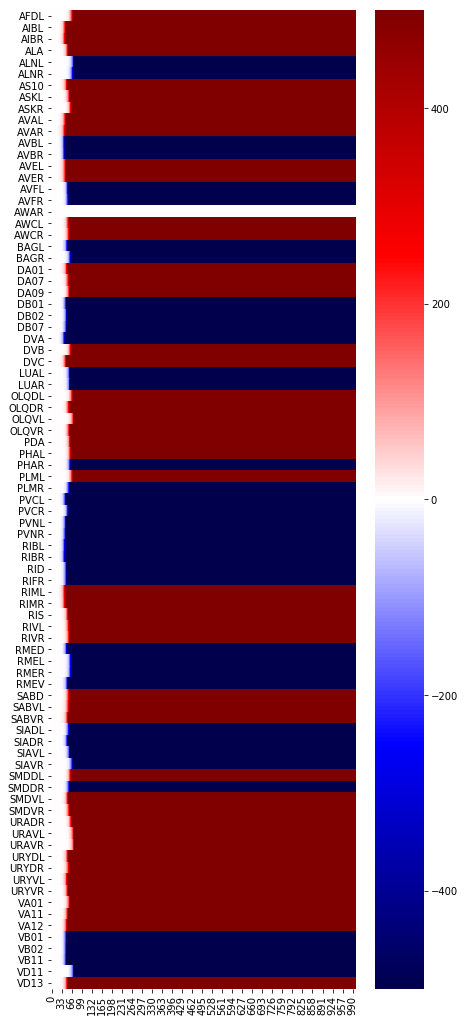

In [212]:

X = calculate(W0, inj=I)
print(X.shape)
plt.plot(X[:, [ava, avar, avb, avbr]])
plt.show()

# plt.plot(calculate(W0, Q[-1]))
# plt.show()

# plt.plot(calculate(W, Q[0]))
# plt.show()


plt.figure(figsize=(15,18))
plt.subplot(121)
sns.heatmap(pd.DataFrame(calculate(W0, inj=I), columns=W.index).T, cmap='seismic', vmin=-500, vmax=500)

# plt.subplot(122)
# sns.heatmap(pd.DataFrame(calculate(W, Q[-1]), columns=W.index).T, cmap='seismic', vmin=-500, vmax=500)
# plt.show()

# plt.figure(figsize=(15,18))
# sns.heatmap(pd.DataFrame(calculate(W, Q[0]), columns=W.index).T, cmap='seismic', vmin=-7, vmax=7)
# plt.show()

# plt.figure(figsize=(15,18))
# sns.heatmap(pd.DataFrame(calculate(W, Q[-1]), columns=W.index).T, cmap='seismic', vmin=-7, vmax=7)
# plt.show()